In [1]:
from regression import *
from zkrp import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## 导入数据 Finance data
'''
Variables:
	  Sector (concept): as listed; nu = size of sector
      Y1 = Job Cost, interval [a1, b1]
	  Y2 = Job Code, interval [a2, b2]
	  Y3 = Activity Code, interval [a3, b3]
	  Y4 = Monthly Cost, interval [a4, b4]
	  Y5 = Annual Budget, interval [a5, b5]
'''

file ="data/Finance data"
f = open(file)
column_name = ['u', 'sector', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a4', 'b4', 'a5', 'b5', 'nu']
data = pd.read_csv(f, sep='\s+', names=column_name) #设置列名和 默认以多个空格来识别数据
n = data.shape[0]
y_l = data['a1'].values.reshape(n,1)
y_u = data['b1'].values.reshape(n,1)
y_c = y_l/2 + y_u/2
y_r = y_u/2 - y_l/2
x1_l = data['a2'].values
x1_u = data['b2'].values
x1_c = x1_l/2 + x1_u/2
x2_l = data['a3'].values
x2_u = data['b3'].values
x2_c = x2_l/2 + x2_u/2
x3_l = np.log(data['a4'].values)
x3_u = np.log(data['b4'].values)
x3_c = x3_l/2 + x3_u/2
x4_l = np.log(data['a5'].values)
x4_u = np.log(data['b5'].values)
x4_c = x4_l/2 + x4_u/2

## 变量太少，将nu变量随机Musk, 作为自变量
x5_l = data['nu'].values - np.array([np.random.randint(i/2) for i in data['nu'].values])
x5_u = data['nu'].values + np.array([np.random.randint(i/2) for i in data['nu'].values])
x5_c = x5_l/2 + x5_u/2

## 加入交叉项
x12_l = x1_l * x2_l
x12_u = x1_u * x2_u
x12_c = x12_l/2 + x12_u/2

x13_l = x1_l * x3_l
x13_u = x1_u * x3_u
x13_c = x13_l/2 + x13_u/2

x14_l = x1_l * x4_l
x14_u = x1_u * x4_u
x14_c = x14_l/2 + x14_u/2

x15_l = x1_l * x5_l
x15_u = x1_u * x5_u
x15_c = x15_l/2 + x15_u/2

x23_l = x2_l * x3_l
x23_u = x2_u * x3_u
x23_c = x23_l/2 + x23_u/2

x24_l = x2_l * x4_l
x24_u = x2_u * x4_u
x24_c = x24_l/2 + x24_u/2

x25_l = x2_l * x5_l
x25_u = x2_u * x5_u
x25_c = x25_l/2 + x25_u/2

x34_l = x3_l * x4_l
x34_u = x3_u * x4_u
x34_c = x34_l/2 + x34_u/2

x35_l = x3_l * x5_l
x35_u = x3_u * x5_u
x35_c = x35_l/2 + x35_u/2

x45_l = x4_l * x5_l
x45_u = x4_u * x5_u
x45_c = x45_l/2 + x45_u/2

x_l = np.vstack((x1_l, x2_l, x3_l, x4_l, x5_l, x12_l, x13_l, x14_l, x15_l, x23_l, x24_l, x25_l, x34_l, x35_l, x45_l)).T
x_u = np.vstack((x1_u, x2_u, x3_u, x4_u, x5_u, x12_u, x13_u, x14_u, x15_u, x23_u, x24_u, x25_u, x34_u, x35_u, x45_u)).T
x_c = np.vstack((x1_c, x2_c, x3_c, x4_c, x5_c, x12_c, x13_c, x14_c, x15_c, x23_c, x24_c, x25_c, x34_c, x35_c, x45_c)).T
x_r = x_u/2 - x_l/2

In [ ]:
 # Mm.fit_transform(x_u/2 + x_l/2)


In [12]:
# beta_cm = CM_Method(x_c, y_c)
# beta_crm_c, beta_crm_r = CRM_Method(x_c, y_c, x_r, y_r)
# beta_ccrm_c, beta_ccrm_r = CCRM_Method(x_c, y_c, x_r, y_r)

In [13]:
# yhat_cm_l = predict(x_l, beta_cm)
# yhat_cm_u = predict(x_u, beta_cm)
# yhat_cm_r = (yhat_cm_u - yhat_cm_l) / 2
# yhat_cm_c = (yhat_cm_u + yhat_cm_l) / 2
#
# yhat_crm_r = predict(x_r, beta_crm_r)
# yhat_crm_c = predict(x_c, beta_crm_c)
# yhat_crm_u = yhat_crm_c + yhat_crm_r / 2
# yhat_crm_l = yhat_crm_c - yhat_crm_r / 2
#
# yhat_ccrm_r = predict(x_r, beta_ccrm_r)
# yhat_ccrm_c = predict(x_c, beta_ccrm_c)
# yhat_ccrm_u = yhat_ccrm_c + yhat_ccrm_r / 2
# yhat_ccrm_l = yhat_ccrm_c - yhat_ccrm_r / 2

In [5]:
# x_list = [np.vstack((x1_l, x1_u)).T,np.vstack((x2_l, x2_u)).T,np.vstack((x3_l, x3_u)).T,np.vstack((x4_l, x4_u)).T,np.vstack((x5_l, x5_u)).T]
x_list = [np.vstack((x_l[:,i], x_u[:,i])).T for i in range(x_l.shape[1])]

In [6]:
### regression 比较

cor_hf = [frechet_correlation(i, np.hstack((y_l, y_u))) for i in x_list]
cor_s = [frechet_correlation(i, np.hstack((y_l, y_u)), method='symbolic') for i in x_list]
cor_mp = [frechet_correlation(i, np.hstack((y_l, y_u)), method='midpoint') for i in x_list]
cor_ab = [frechet_correlation(i, np.hstack((y_l, y_u)), method='arithmetic-based') for i in x_list]

100%|██████████| 14/14 [00:00<00:00, 127.99it/s]


In [9]:
# np.mean(x1,axis=1)

array([4. , 3.5, 4. , 2. , 4. , 3.5, 3.5, 3.5, 4. , 3. , 3. , 1. , 3. ,
       1. ])

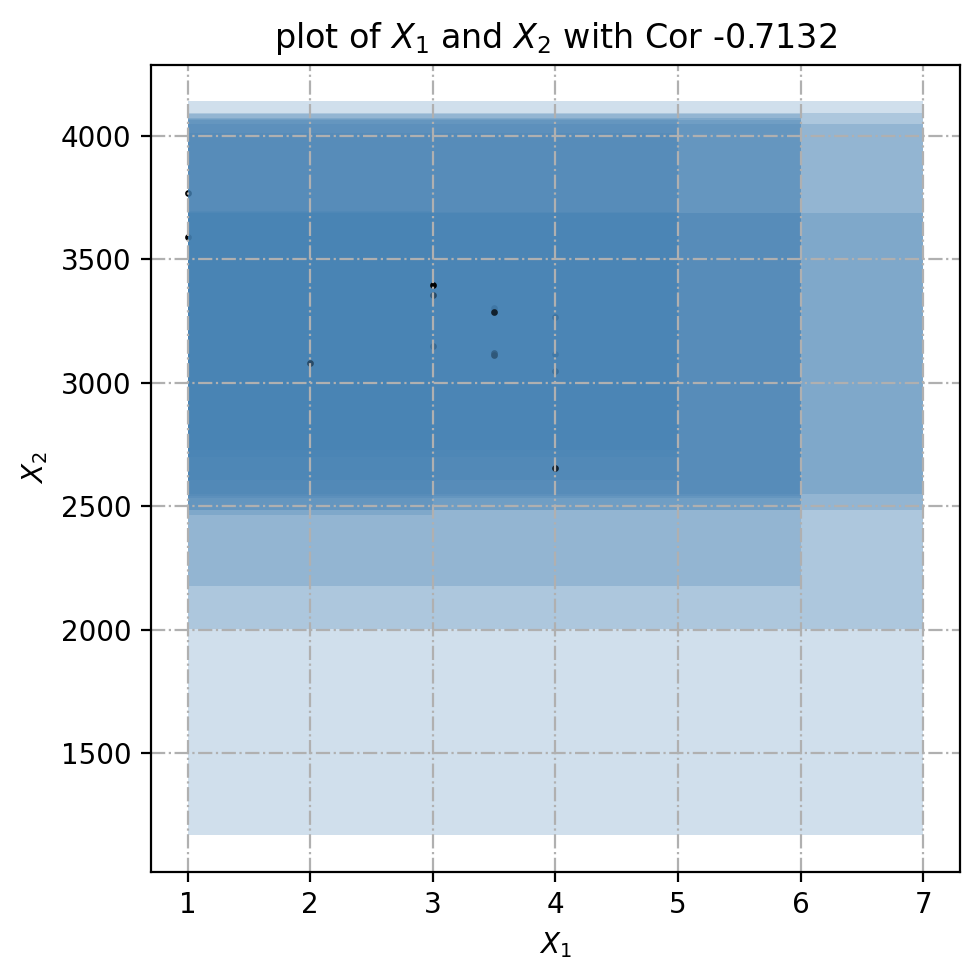

100%|██████████| 14/14 [00:00<00:00, 127.16it/s]

hausdorff-cor: 0.7502
midpoint-cor: -0.7132
symbolic-cor: 0.4448
arithmetic-based-cor: -0.0187
range-cor: 0.6258


In [10]:
# 画出y和x1 的cor
x1 = np.vstack((x1_l, x1_u)).T
y = np.hstack((y_l, y_u))
real_x1_y = np.vstack((np.mean(x1,axis=1), np.mean(y,axis=1))).T
range_x1_y = np.vstack((x1[:,1]/2 - x1[:,0]/2, y[:,1]/2 - y[:,0]/2)).T
show3(x1, y, path = './fig/Finance data x1 and y.jpg', real = real_x1_y, Cor = np.corrcoef(real_x1_y.T)[0][1], samples=x1.shape[0])

print("hausdorff-cor: %.4f" % frechet_correlation(x1, y))
print("midpoint-cor: %.4f" % np.corrcoef(real_x1_y.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(x1, y, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(x1, y, method='arithmetic-based'))
print("range-cor: %.4f" % np.corrcoef(range_x1_y.T)[0][1])

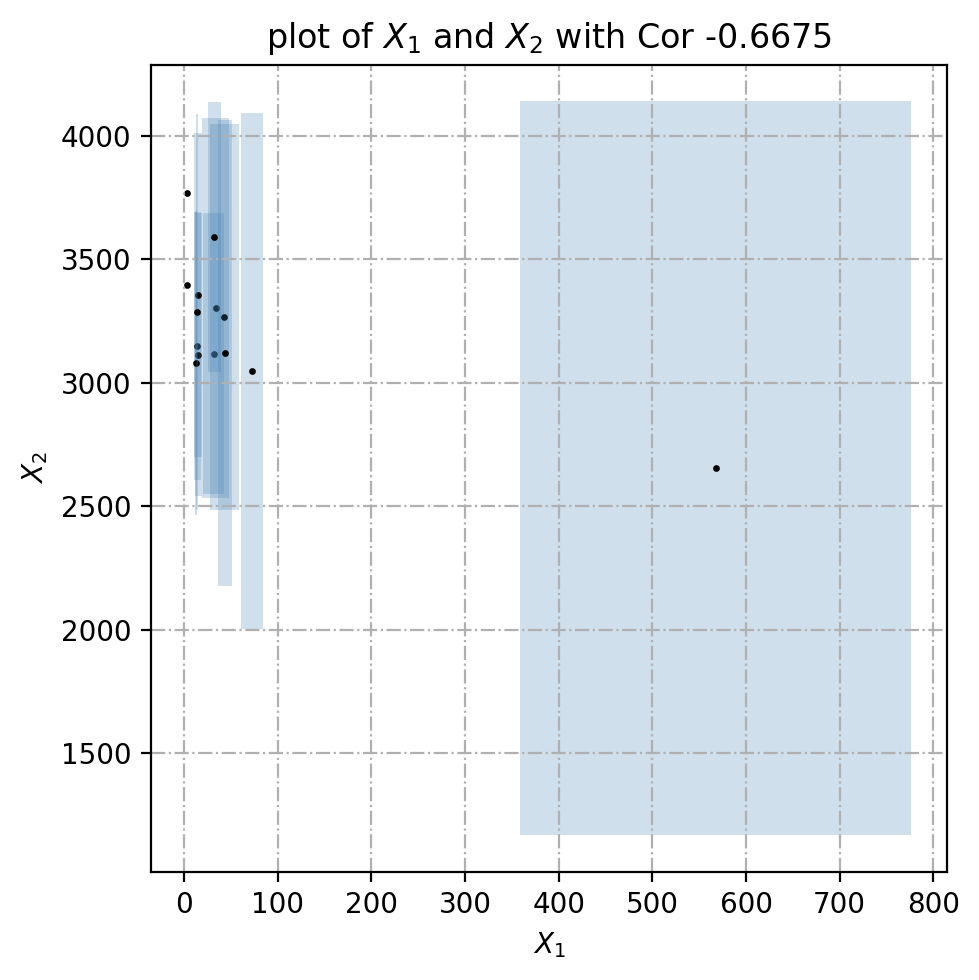

100%|██████████| 14/14 [00:00<00:00, 123.78it/s]

hausdorff-cor: 0.7439
midpoint-cor: -0.6675
symbolic-cor: -0.2005
arithmetic-based-cor: -0.2420
range-cor: 0.7821


In [11]:
x5 = np.vstack((x5_l, x5_u)).T
y = np.hstack((y_l, y_u))
real_x5_y = np.vstack((np.mean(x5,axis=1), np.mean(y,axis=1))).T
range_x5_y = np.vstack((x5[:,1]/2 - x5[:,0]/2, y[:,1]/2 - y[:,0]/2)).T
show3(x5, y, path = './fig/Finance data x5 and y.jpg', real = real_x5_y, Cor = np.corrcoef(real_x5_y.T)[0][1], samples=x5.shape[0])

print("hausdorff-cor: %.4f" % frechet_correlation(x5, y))
print("midpoint-cor: %.4f" % np.corrcoef(real_x5_y.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(x5, y, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(x5, y, method='arithmetic-based'))
print("range-cor: %.4f" % np.corrcoef(range_x5_y.T)[0][1])

In [7]:
x_hf_c = x_c[:,np.argsort(-np.abs(cor_hf)).tolist()]
x_hf_r = x_r[:,np.argsort(-np.abs(cor_hf)).tolist()]

x_s_c = x_c[:,np.argsort(-np.abs(cor_s)).tolist()]
x_s_r = x_r[:,np.argsort(-np.abs(cor_s)).tolist()]

x_mp_c = x_c[:,np.argsort(-np.abs(cor_mp)).tolist()]
x_mp_r = x_r[:,np.argsort(-np.abs(cor_mp)).tolist()]

x_ab_c = x_c[:,np.argsort(-np.abs(cor_ab)).tolist()]
x_ab_r = x_r[:,np.argsort(-np.abs(cor_ab)).tolist()]

In [27]:
# Regression = [CM_Method, CRM_Method, CCRM_Method]
# Regression[0].__name__

'CM_Method'

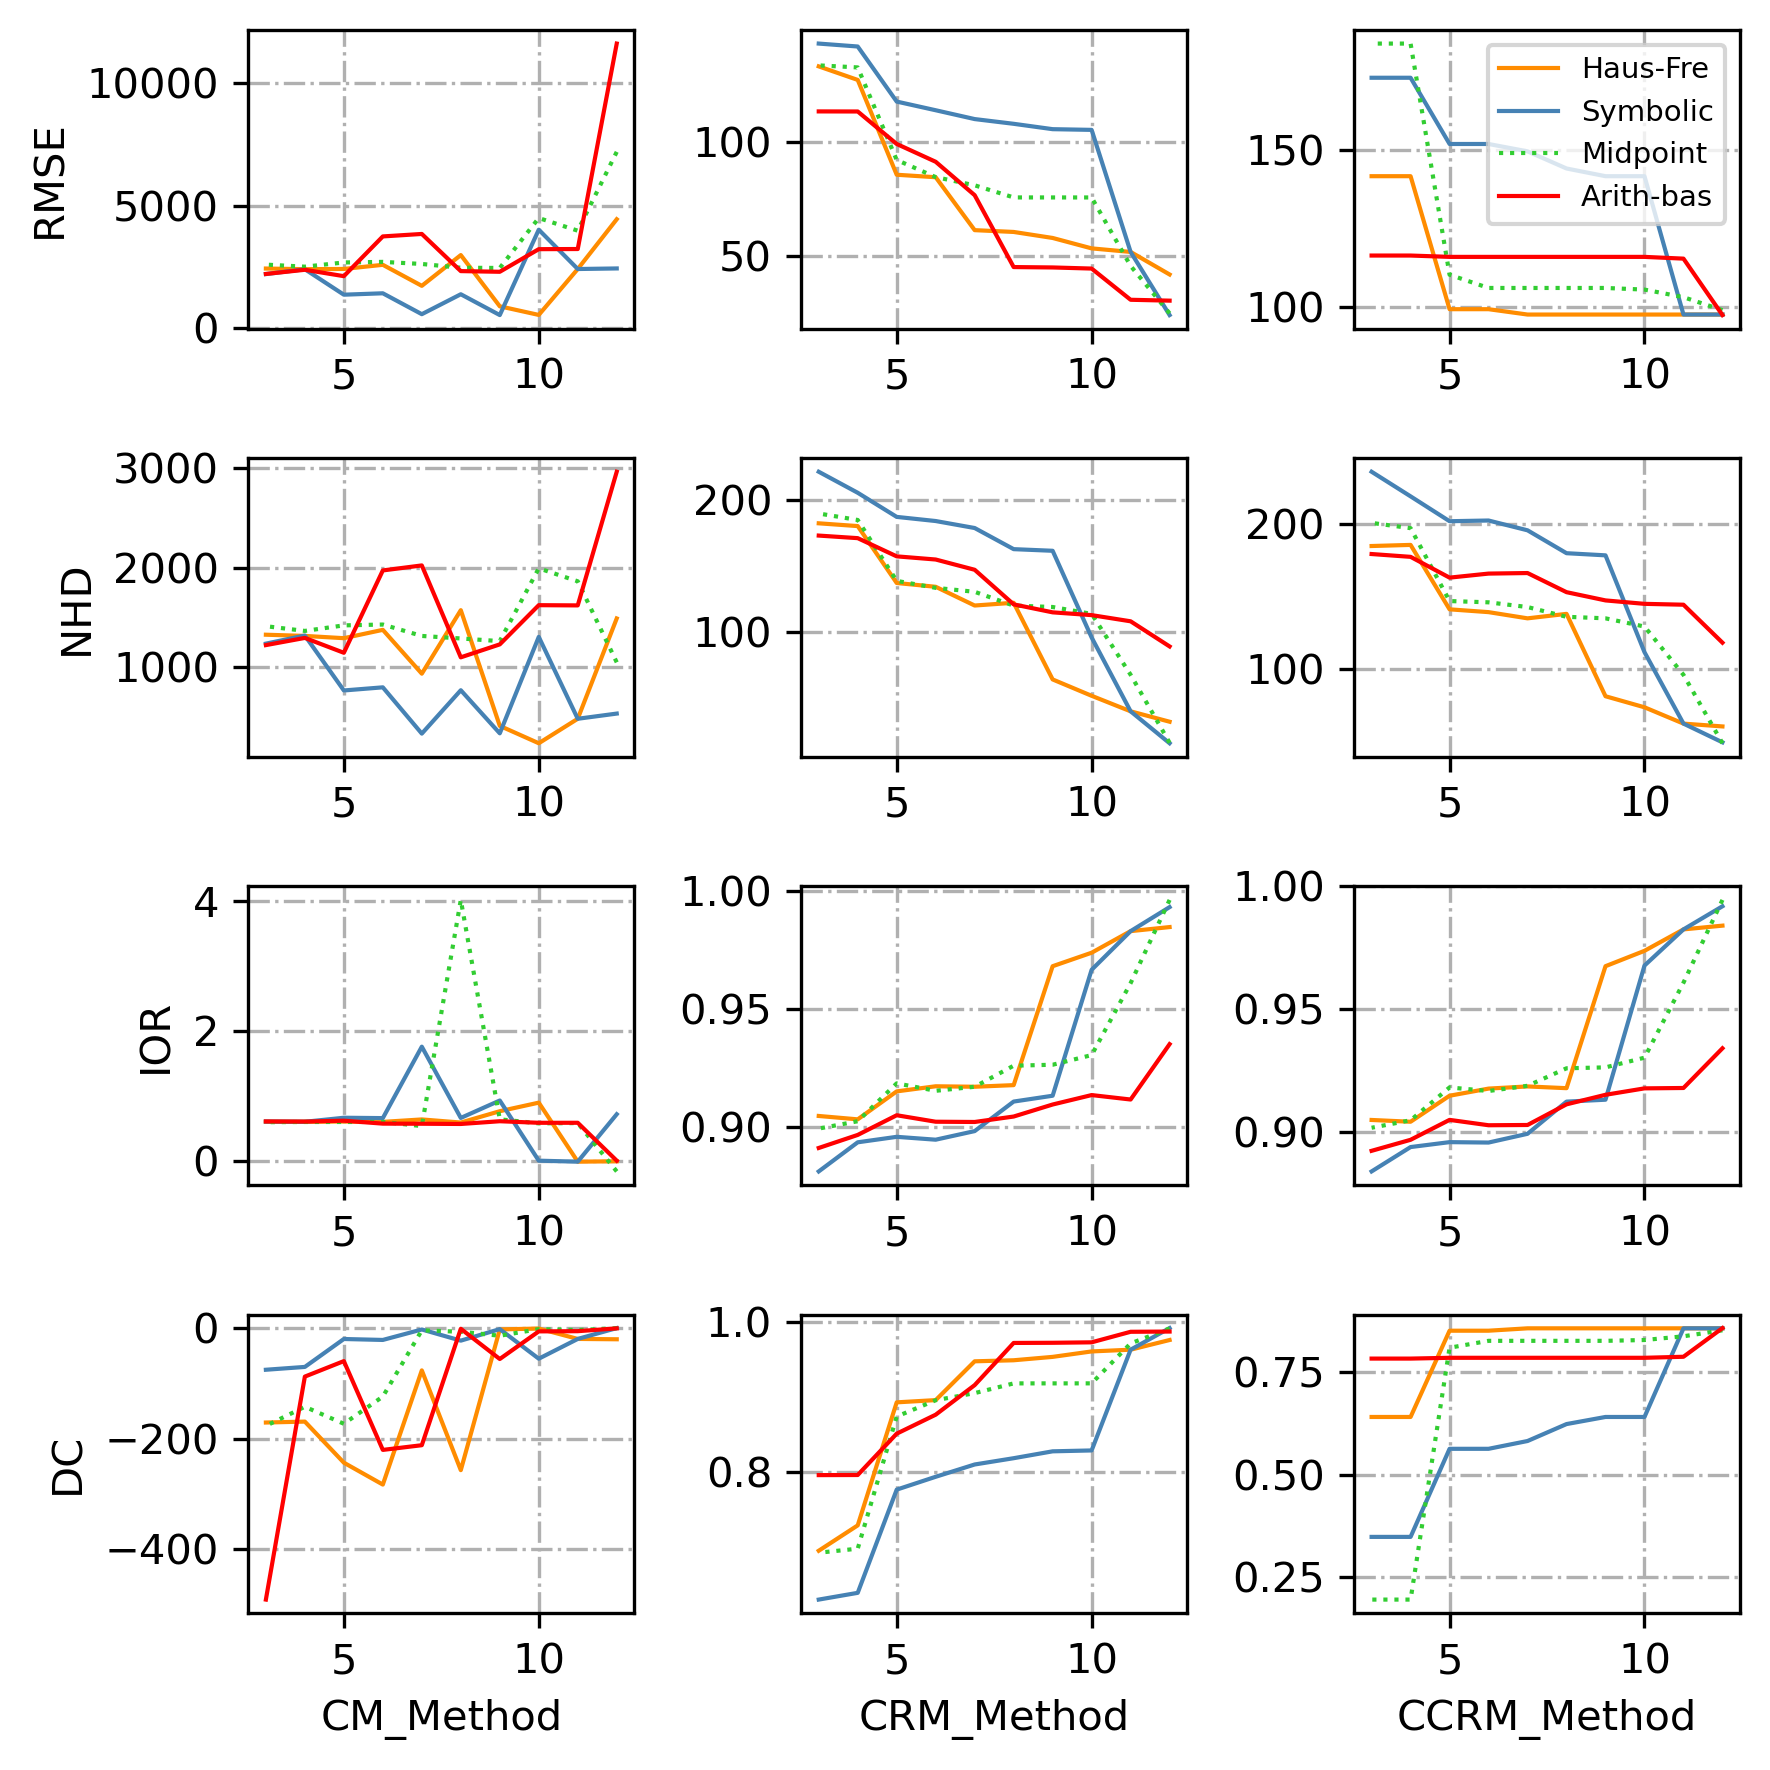

In [13]:
reglist = [CM_Method, CRM_Method, CCRM_Method]
evallist = ['RMSE', 'NHD', 'IOR', 'DC']
var_num = [12,11,10,9,8,7,6,5,4,3]

fig, axes = plt.subplots(4, 3, figsize=(6,6), dpi=300)

# for i, row in enumerate(axes):
#     for j, col in enumerate(row):
#         pass
a = None
b = None
c = None

for i in range(len(evallist)):
    for j in range(len(reglist)):
        y_h = []
        y_s = []
        y_m = []
        y_a = []
        for k in var_num:
            xx_hf_c = x_hf_c[:, 0:k]
            xx_hf_r = x_hf_r[:, 0:k]
            xx_s_c = x_s_c[:, 0:k]
            xx_s_r = x_s_r[:, 0:k]
            xx_mp_c = x_mp_c[:, 0:k]
            xx_mp_r = x_mp_r[:, 0:k]
            xx_ab_c = x_ab_c[:, 0:k]
            xx_ab_r = x_ab_r[:, 0:k]
            if reglist[j] == CM_Method:
                beta_hf = CM_Method(xx_hf_c, y_c)
                yhat_hf_c = predict(xx_hf_c, beta_hf)
                yhat_hf_r = predict(xx_hf_r, beta_hf)

                beta_s = CM_Method(xx_s_c, y_c)
                yhat_s_c = predict(xx_s_c, beta_s)
                yhat_s_r = predict(xx_s_r, beta_s)

                beta_mp = CM_Method(xx_mp_c, y_c)
                yhat_mp_c = predict(xx_mp_c, beta_mp)
                yhat_mp_r = predict(xx_mp_r, beta_mp)

                beta_ab = CM_Method(xx_ab_c, y_c)
                yhat_ab_c = predict(xx_ab_c, beta_ab)
                yhat_ab_r = predict(xx_ab_r, beta_ab)
            else:
                beta_hf_c, beta_hf_r = reglist[j](xx_hf_c, y_c, xx_hf_r, y_r)
                yhat_hf_c = predict(xx_hf_c, beta_hf_c)
                yhat_hf_r = predict(xx_hf_r, beta_hf_r)

                beta_s_c, beta_s_r = reglist[j](xx_s_c, y_c, xx_s_r, y_r)
                yhat_s_c = predict(xx_s_c, beta_s_c)
                yhat_s_r = predict(xx_s_r, beta_s_r)

                beta_mp_c, beta_mp_r = reglist[j](xx_mp_c, y_c, xx_mp_r, y_r)
                yhat_mp_c = predict(xx_mp_c, beta_mp_c)
                yhat_mp_r = predict(xx_mp_r, beta_mp_r)

                beta_ab_c, beta_ab_r = reglist[j](xx_ab_c, y_c, xx_ab_r, y_r)
                yhat_ab_c = predict(xx_ab_c, beta_ab_c)
                yhat_ab_r = predict(xx_ab_r, beta_ab_r)

            y_h.append(eval(yhat_hf_c, yhat_hf_r, y_c, y_r, method=evallist[i]))
            y_s.append(eval(yhat_s_c, yhat_s_r, y_c, y_r, method=evallist[i]))
            y_m.append(eval(yhat_mp_c, yhat_mp_r, y_c, y_r, method=evallist[i]))
            y_a.append(eval(yhat_ab_c, yhat_ab_r, y_c, y_r, method=evallist[i]))

        axes[i, j].plot(var_num, y_h, lw=1, label='Haus-Fre', color='darkorange')
        axes[i, j].plot(var_num, y_s, lw=1, label='Symbolic', color='steelblue')
        axes[i, j].plot(var_num, y_m, lw=1, label='Midpoint', color='limegreen', ls=':')
        axes[i, j].plot(var_num, y_a, lw=1, label='Arith-bas', color='red')

        if i == 3:
            axes[i, j].set_xlabel(reglist[j].__name__)
        if j == 0:
            axes[i, j].set_ylabel(evallist[i])
        axes[i, j].grid(True, ls='-.')

        if i==0 and j ==2:
            axes[i, j].legend(loc='upper right', fontsize=7)

# plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [7]:
plt.close()